In [2]:
!python --version

Python 3.7.13


In [3]:
!pip install h2o matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.1 MB 41 kB/s 
  Created wheel for h2o: filename=h2o-3.36.1.4-py2.py3-none-any.whl size=177128127 sha256=d737ec0e311d580fdf9136744cb448d3f2373869661f76746b57d7f10cd0214f
  Stored in directory: /root/.cache/pip/wheels/02/f9/18/5fbae4db903beda26f764b6e035cb41b37713fed8a6b9cd403
Successfully built h2o


In [4]:
!java --version

openjdk 11.0.16 2022-07-19
OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04)
OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)


In [5]:
import h2o
from h2o.estimators import H2OGradientBoostingEstimator

import matplotlib.pyplot as plt

In [6]:
# initialize h2o cluster
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.16" 2022-07-19; OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04); OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpib06g35i
  JVM stdout: /tmp/tmpib06g35i/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpib06g35i/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.4
H2O_cluster_version_age:,23 days
H2O_cluster_name:,H2O_from_python_unknownUser_jxa2f6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [7]:
# load data from external sources
data = h2o.import_file("https://s3.amazonaws.com/data.h2o.ai/Training/CreditCard.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [8]:
type(data)

h2o.frame.H2OFrame

In [9]:
dir(data)

['_H2OFrame__fdopen_kwargs',
 '__LOCAL_EXPANSION_ON_SINGLE_IMPORT__',
 '__abs__',
 '__add__',
 '__and__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__unicode__',
 '__weakref__',
 '_compute_ncol_update',
 '_compute_nrow_update',
 '_ex',
 '_expr',
 '_frame',
 '_has_content',
 '_import_parse',
 '_is_expr_in_self',


In [10]:
data.head()

ID,CreditLimit,Sex,Education,Marriage,Age,Status1,Status2,Status3,Status4,Status5,Status6,BillAmt1,BillAmt2,BillAmt3,BillAmt4,BillAmt5,BillAmt6,PayAmt1,PayAmt2,PayAmt3,PayAmt4,PayAmt5,PayAmt6,Default
1,20000,F,2,M,24,1,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,F,2,S,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,F,2,S,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,F,2,M,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,M,2,M,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,M,1,S,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,M,1,S,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,F,2,S,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
9,140000,F,3,M,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,20000,M,3,S,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


In [11]:
data.columns

['ID',
 'CreditLimit',
 'Sex',
 'Education',
 'Marriage',
 'Age',
 'Status1',
 'Status2',
 'Status3',
 'Status4',
 'Status5',
 'Status6',
 'BillAmt1',
 'BillAmt2',
 'BillAmt3',
 'BillAmt4',
 'BillAmt5',
 'BillAmt6',
 'PayAmt1',
 'PayAmt2',
 'PayAmt3',
 'PayAmt4',
 'PayAmt5',
 'PayAmt6',
 'Default']

In [12]:
# check shape of data
data.shape

(29999, 25)

In [13]:
# drop id column & set target variable as a catogarical variable
data = data.drop(["ID"])
data["Default"] = data["Default"].asfactor()

In [14]:
data.head()

CreditLimit,Sex,Education,Marriage,Age,Status1,Status2,Status3,Status4,Status5,Status6,BillAmt1,BillAmt2,BillAmt3,BillAmt4,BillAmt5,BillAmt6,PayAmt1,PayAmt2,PayAmt3,PayAmt4,PayAmt5,PayAmt6,Default
20000,F,2,M,24,1,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
120000,F,2,S,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
90000,F,2,S,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
50000,F,2,M,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
50000,M,2,M,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
50000,M,1,S,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
500000,M,1,S,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
100000,F,2,S,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
140000,F,3,M,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
20000,M,3,S,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


In [15]:
# split data into train, test & valid
train, test, valid = data.split_frame([.7,.2])

In [16]:
# Question 1: Check shape of train, test and valid
print(train.shape)
print(test.shape)
print(valid.shape)

(20855, 24)
(6074, 24)
(3070, 24)


In [17]:
# get feature names
x = data.columns.remove("Default")

In [18]:
# create & train the model
gbm = H2OGradientBoostingEstimator(model_id="gbm_model", seed=1234)
gbm.train(x=x ,y="Default", training_frame=train, validation_frame=valid)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm_model


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,20143.0,5.0,5.0,5.0,8.0,32.0,27.38




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.1271439076439295
RMSE: 0.3565724437529203
LogLoss: 0.40761028937929933
Mean Per-Class Error: 0.2634706748057567
AUC: 0.8143639785657922
AUCPR: 0.6112084710767279
Gini: 0.6287279571315845

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2362866575847856: 


,,0,1,Error,Rate
0,0,13588.0,2654.0,0.1634,(2654.0/16242.0)
1,1,1677.0,2936.0,0.3635,(1677.0/4613.0)
2,Total,15265.0,5590.0,0.2077,(4331.0/20855.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.236287,0.575517,229.0
1,max f2,0.138409,0.666992,302.0
2,max f0point5,0.427132,0.606800,147.0
3,max accuracy,0.427132,0.827955,147.0
4,max precision,0.898706,1.000000,0.0
5,max recall,0.040845,1.000000,393.0
6,max specificity,0.898706,1.000000,0.0
7,max absolute_mcc,0.350844,0.455359,180.0
8,max min_per_class_accuracy,0.181070,0.733653,264.0
9,max mean_per_class_accuracy,0.199241,0.739737,251.0



Gains/Lift Table: Avg response rate: 22.12 %, avg score: 22.13 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010022,0.764089,4.347870,4.347870,0.961722,0.799115,0.961722,0.799115,0.043573,0.043573,334.786961,334.786961,0.043080
1,2,0.020043,0.728284,3.828721,4.088295,0.846890,0.744189,0.904306,0.771652,0.038370,0.081942,282.872100,308.829530,0.079480
2,3,0.030017,0.706187,3.629776,3.935944,0.802885,0.716430,0.870607,0.753304,0.036202,0.118144,262.977643,293.594398,0.113157
3,4,0.040038,0.685719,3.374466,3.795406,0.746411,0.696046,0.839521,0.738972,0.033817,0.151962,237.446596,279.540637,0.143712
4,5,0.050012,0.664763,3.303749,3.697358,0.730769,0.674552,0.817833,0.726125,0.032950,0.184912,230.374860,269.735765,0.173214
5,6,0.100024,0.557498,2.943149,3.320253,0.651007,0.612304,0.734420,0.669214,0.147193,0.332105,194.314870,232.025318,0.297996
6,7,0.150036,0.439546,2.336314,2.992273,0.516779,0.504543,0.661873,0.614324,0.116844,0.448949,133.631392,199.227342,0.383809
7,8,0.200000,0.337726,1.835268,2.703230,0.405950,0.387334,0.597938,0.557617,0.091697,0.540646,83.526756,170.323000,0.437395
8,9,0.300024,0.212723,1.304695,2.236977,0.288591,0.264705,0.494806,0.459964,0.130501,0.671147,30.469479,123.697709,0.476528
9,10,0.400000,0.170083,0.854313,1.891394,0.188969,0.189355,0.418365,0.392328,0.085411,0.756558,-14.568722,89.139389,0.457826




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.13834434257441774
RMSE: 0.37194669318924956
LogLoss: 0.43752693390231573
Mean Per-Class Error: 0.28361434379085204
AUC: 0.7775014006420141
AUCPR: 0.536168283158874
Gini: 0.5550028012840282

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.23945287370817475: 


,,0,1,Error,Rate
0,0,1997.0,382.0,0.1606,(382.0/2379.0)
1,1,281.0,410.0,0.4067,(281.0/691.0)
2,Total,2278.0,792.0,0.216,(663.0/3070.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.239453,0.552933,213.0
1,max f2,0.147179,0.641567,287.0
2,max f0point5,0.433523,0.573903,134.0
3,max accuracy,0.463066,0.815309,125.0
4,max precision,0.829568,1.000000,0.0
5,max recall,0.050926,1.000000,388.0
6,max specificity,0.829568,1.000000,0.0
7,max absolute_mcc,0.324263,0.426483,177.0
8,max min_per_class_accuracy,0.173739,0.706223,261.0
9,max mean_per_class_accuracy,0.226466,0.717292,221.0



Gains/Lift Table: Avg response rate: 22.51 %, avg score: 21.79 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010749,0.752353,3.365785,3.365785,0.757576,0.783608,0.757576,0.783608,0.036179,0.036179,236.578520,236.578520,0.032817
1,2,0.020195,0.722099,3.217226,3.296298,0.724138,0.732673,0.741935,0.759784,0.030391,0.066570,221.722641,229.629803,0.059845
2,3,0.030293,0.700782,3.152981,3.248526,0.709677,0.711282,0.731183,0.743616,0.031838,0.098408,215.298072,224.852559,0.087899
3,4,0.040065,0.679012,2.369513,3.034132,0.533333,0.689683,0.682927,0.730462,0.023155,0.121563,136.951278,203.413222,0.105170
4,5,0.050163,0.653938,2.579711,2.942658,0.580645,0.666238,0.662338,0.717534,0.026049,0.147612,157.971150,194.265792,0.125754
5,6,0.100000,0.544719,2.874777,2.908828,0.647059,0.598199,0.654723,0.658061,0.143271,0.290883,187.477654,190.882779,0.246326
6,7,0.150163,0.426976,2.538764,2.785206,0.571429,0.490897,0.626898,0.602218,0.127352,0.418234,153.876370,178.520551,0.345935
7,8,0.200326,0.326120,1.961772,2.579012,0.441558,0.372627,0.580488,0.544727,0.098408,0.516643,96.177195,157.901239,0.408194
8,9,0.300000,0.209124,1.161526,2.108056,0.261438,0.255428,0.474484,0.448608,0.115774,0.632417,16.152587,110.805596,0.428970
9,10,0.400000,0.168113,0.868307,1.798119,0.195440,0.187103,0.404723,0.383232,0.086831,0.719247,-13.169320,79.811867,0.411976




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-08-27 06:29:31,0.136 sec,0.0,0.415051,0.528415,0.500000,0.221194,1.000000,0.778806,0.417654,0.533308,0.500000,0.225081,1.000000,0.774919
1,,2022-08-27 06:29:32,0.995 sec,1.0,0.406697,0.509389,0.752702,0.520903,3.271269,0.218701,0.409798,0.515265,0.748907,0.506925,3.066990,0.219218
2,,2022-08-27 06:29:32,1.294 sec,2.0,0.399811,0.494931,0.765719,0.530079,3.277343,0.208583,0.403430,0.501716,0.760387,0.513256,3.059967,0.214984
3,,2022-08-27 06:29:32,1.550 sec,3.0,0.394053,0.483434,0.772036,0.541051,3.676545,0.210070,0.398025,0.490759,0.765326,0.522527,3.300393,0.224104
4,,2022-08-27 06:29:33,1.745 sec,4.0,0.389362,0.474320,0.773162,0.545789,3.649239,0.206090,0.393886,0.482562,0.763963,0.520109,3.365785,0.211401
5,,2022-08-27 06:29:33,1.921 sec,5.0,0.385500,0.466914,0.773704,0.547838,3.828721,0.203213,0.390366,0.475688,0.764394,0.520423,3.250856,0.212378
6,,2022-08-27 06:29:33,2.102 sec,6.0,0.382231,0.460733,0.776960,0.550023,3.878036,0.199808,0.387506,0.470104,0.770783,0.525820,3.365785,0.211726
7,,2022-08-27 06:29:33,2.295 sec,7.0,0.379540,0.455654,0.778694,0.553685,3.790617,0.200048,0.385049,0.465401,0.770769,0.527729,3.296298,0.212052
8,,2022-08-27 06:29:33,2.521 sec,8.0,0.377267,0.451332,0.780370,0.556180,3.845850,0.199233,0.383097,0.461572,0.772559,0.527296,3.193289,0.212704
9,,2022-08-27 06:29:34,2.754 sec,9.0,0.375352,0.447664,0.781053,0.556394,3.846747,0.196356,0.381587,0.458670,0.770384,0.525387,3.296298,0.211075



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Status1,2462.961426,1.000000,0.508660
1,Status2,531.101440,0.215635,0.109685
2,Status3,275.088654,0.111690,0.056812
3,CreditLimit,214.067581,0.086915,0.044210
4,Status5,163.979065,0.066578,0.033866
5,BillAmt1,143.189468,0.058137,0.029572
6,Status6,115.679680,0.046968,0.023891
7,Status4,110.937553,0.045042,0.022911
8,Age,97.562248,0.039612,0.020149
9,PayAmt1,81.725861,0.033182,0.016878



See the whole table with table.as_data_frame()


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


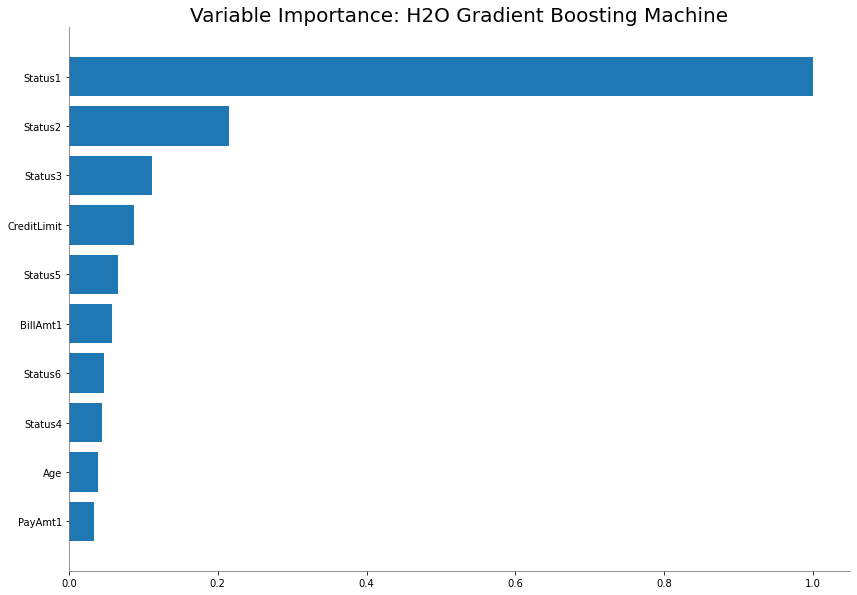

<Figure size 432x288 with 0 Axes>

In [19]:
# get variable importance plot
%matplotlib inline
gbm.varimp_plot()

PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%

PartialDependence: Partial Dependence Plot of model gbm_model on column 'CreditLimit'.


,creditlimit,mean_response,stddev_response,std_error_mean_response
0,10000.000000,0.291479,0.171980,0.001191
1,51578.947368,0.245136,0.178694,0.001237
2,93157.894737,0.229889,0.183961,0.001274
3,134736.842105,0.223377,0.184157,0.001275
4,176315.789474,0.195993,0.178424,0.001236
5,217894.736842,0.196936,0.180123,0.001247
6,259473.684211,0.197054,0.180092,0.001247
7,301052.631579,0.190992,0.180030,0.001247
8,342631.578947,0.183002,0.181046,0.001254
9,384210.526316,0.181520,0.181008,0.001253


[]

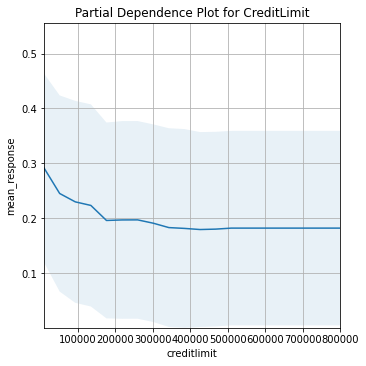

In [20]:
# get partial importance plot
gbm.partial_plot(train, cols = ["CreditLimit"], figsize = (5, 5))

In [ ]:
gbm.explain(frame=test, columns=["credit"])